# Google Playstore rating data case study


In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
#read the dataset and check the first five rows
ps_data=pd.read_csv("googleplaystore_v2.csv")
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
ps_data.shape

(10841, 13)

### Data handeling and cleaning



The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 __For Missing Values:__ Some common techniques to treat this issue are

   -Dropping the rows containing the missing values

   -Imputing the missing values

   -Keep the missing values if they don't affect the analysis

__Incorrect Data Types:__

   -Clean certain values

   -Clean and convert an entire column

In [4]:
#Check the datatypes of all the columns of the dataframe
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
#Check the number of null values in the columns
ps_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

__Handling missing values for rating__

- Ratings is the target variable

- Drop the records

In [6]:
#Drop the rows having null values in the Rating field
ps_data1=ps_data[~ps_data.Rating.isnull()]


#Check the shape of the dataframe
ps_data1.shape

(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
ps_data1.Rating.isnull().sum()

0

In [8]:
#Check the number of nulls in the dataframe again and find the total number of null values
ps_data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Explore/Understsnd the nulls for the column Android version

In [9]:
ps_data1[ps_data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Dropping

In [10]:

ps_data1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [11]:

ps_data1[(ps_data1['Android Ver'].isnull() & (ps_data1.Category=='1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
#Drop the row having shifted values
ps_data1=ps_data1[~(ps_data1['Android Ver'].isnull() & (ps_data1.Category=='1.9'))]

In [13]:
#Check the nulls again in Android version column to cross-verify
ps_data1[ps_data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


__Imputing Missing Values__

For numerical variables use mean and median

For categorical variables use mode


In [14]:
#Check the most common value in the Android version column
ps_data1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [15]:
#Check the most common value in the Current version column
ps_data1['Android Ver'].mode()[0]

'4.1 and up'

Filling NANs with this value

In [16]:
#Fill up the nulls in the Android Version column with the above value
ps_data1['Android Ver']=ps_data1['Android Ver'].fillna(ps_data1["Android Ver"].mode()[0])

In [17]:
#Check the nulls in the Android version column again to cross-verify
ps_data1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [18]:
#Check the nulls in the entire dataframe again
ps_data1['Android Ver'].isnull().sum()

0

In [19]:
ps_data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

Missing values in Current Ver

In [20]:
ps_data1[ps_data1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [21]:
#Check the most common value in the Current Ver column
ps_data['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.0.17.3905              1
15.1.2                   1
4.94.19                  1
1.1.11.11                1
2.0.148.0                1
Name: Current Ver, Length: 2832, dtype: int64

In [22]:
ps_data1['Current Ver'].mode()[0]

'Varies with device'

Replace the missing values with 'Varies with device'

In [23]:
#Fill up the nulls in the Current Ver column with the above value
ps_data1['Current Ver']=ps_data1['Current Ver'].fillna(ps_data1['Current Ver'].mode()[0])

In [24]:
#Check the nulls in the entire dataframe again
ps_data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Change the variable to the correct types.

In [25]:
#checking data types
ps_data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
#check first five rows 
ps_data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Price column

In [27]:
#Check the most common value in the Price column
ps_data.Price.value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [28]:
#Write the function to make the changes
ps_data1.Price=ps_data1.Price.apply(lambda x : 0 if x=="0" else float(x[1:]))

In [29]:
#checking data type of Price
ps_data1.Price.dtype

dtype('float64')

In [30]:
#Check the most common value in the Price column
ps_data1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [31]:
#
ps_data1.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [32]:
#Analyse the Reviews column
ps_data1.Reviews=ps_data1.Reviews.astype("int32")

In [33]:
ps_data1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [34]:
#Verify the dtype of Price once again
ps_data1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [35]:
ps_data.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [36]:
ps_data1['Installs']=ps_data1['Installs'].apply(lambda x:int(str(x).replace(",",'').rstrip('+')))

In [37]:
#Analyse the Installs Column
ps_data1.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [38]:
ps_data1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### sanity check

Average Rating  between 1-5

In [39]:
ps_data1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Reviews should be <= Install

In [40]:
#Perform the sanity checks on the Reviews column
ps_data1[(ps_data1.Reviews > ps_data1.Installs)].shape

(7, 13)

In [41]:
ps_data1[(ps_data1.Reviews > ps_data1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [42]:
ps_data1=ps_data1[(ps_data1.Reviews <= ps_data1.Installs)]

For free app price should not be zero

In [43]:
#perform the sanity checks on prices of free apps
ps_data1[(ps_data1.Type=="Free") & (ps_data1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [44]:
ps_data1=ps_data1[ps_data1.Price<=30]
ps_data1.shape

(9338, 13)

Reviews-How reviews are distributed.

In [45]:
#import the plotting libraries
import matplotlib.pyplot as plt
?plt.hist

(array([9.212e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

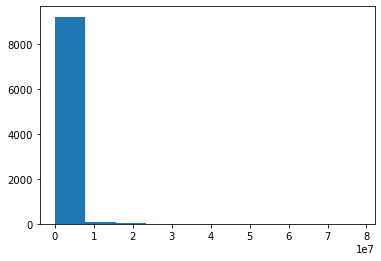

In [46]:
#Create a histogram of the Reviews
plt.hist(ps_data1.Reviews)

<function matplotlib.pyplot.show(close=None, block=None)>

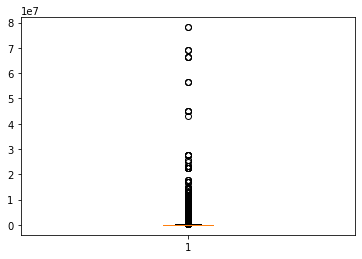

In [47]:
#Create a boxplot of the Reviews column
plt.boxplot(ps_data1.Reviews)
plt.show

Checking out the records with more than 10 million reviews

In [48]:
ps_data1[ps_data1.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [49]:
#Check records with 1 million reviews
ps_data1=ps_data1[ps_data1.Reviews<=1000000]
ps_data1.shape

(8634, 13)

## Data analysis to answer buissiness questions

In [50]:
import warnings
warnings.filterwarnings('ignore')

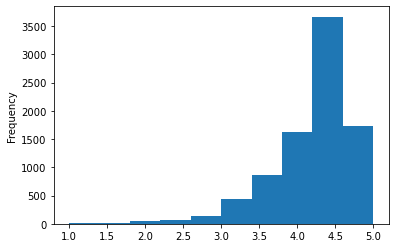

In [51]:
ps_data1.Rating.plot.hist()
plt.show()

## Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

Functionalities of Seaborn :

1. Dataset oriented API
2. Analysing univariate and bivariate distributions
3. Automatic estimation and plotting of linear regression models
4. Convenient views for complex datasets
5. Concise control over style
6. Colour palettes

In [52]:
#import the necessary libraries
import seaborn as sns

__Distribution Plots__

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the KDE) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

Distplot

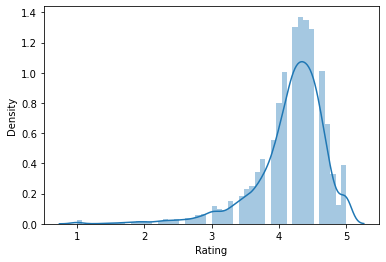

In [53]:
#Create a distribution plot for rating
sns.distplot(ps_data1.Rating)
plt.show()

Histogram with limited number of bins- 20

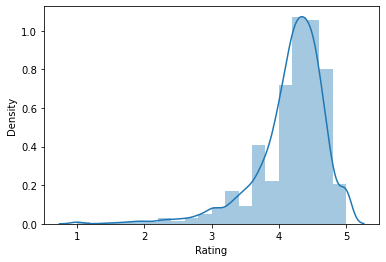

In [54]:
#Change the number of bins
sns.distplot(ps_data1.Rating, bins=20)
plt.show()

Changing the colour of plot

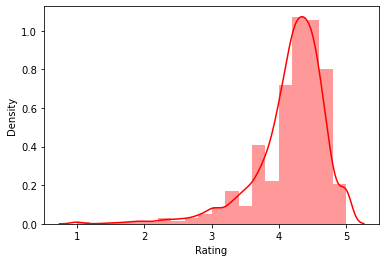

In [55]:
sns.distplot(ps_data1.Rating, bins=20, color='r')
plt.show()

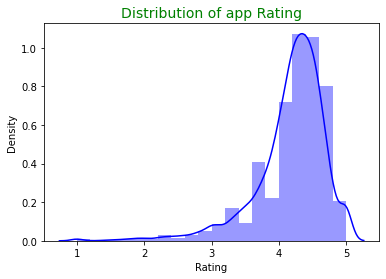

In [56]:
#Apply matplotlib functionalities
sns.distplot(ps_data1.Rating, bins=20,color='b')
plt.title('Distribution of app Rating',fontsize=14,color='g')
plt.show()

## Use different style

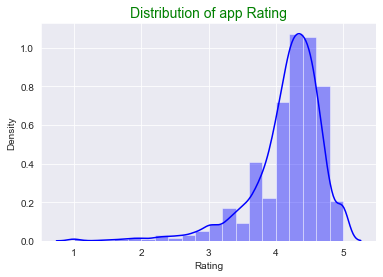

In [57]:
sns.set_style('darkgrid')
sns.distplot(ps_data1.Rating, bins=20,color='b')
plt.title('Distribution of app Rating',fontsize=14,color='g')
plt.show()

## Matplotlib themese/styles

In [58]:
#Check all the styling options
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [59]:
plt.style.use('seaborn-poster')

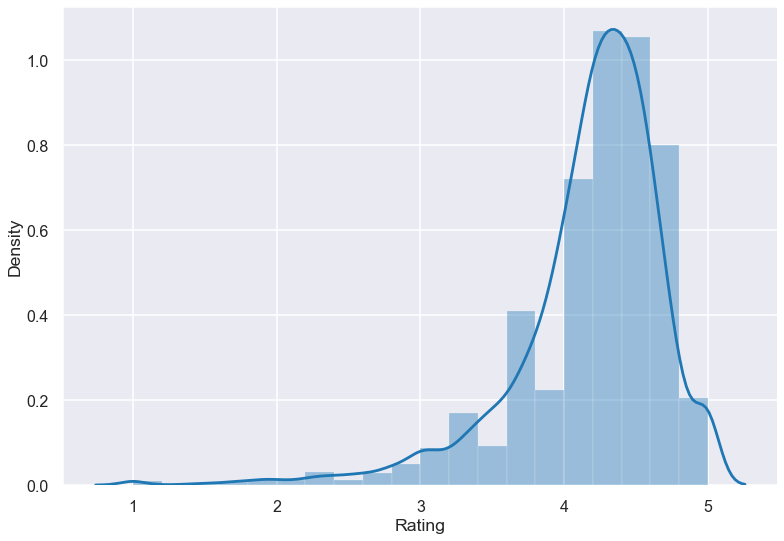

In [60]:
sns.distplot(ps_data1.Rating,bins=20)
plt.show()

In [61]:
plt.style.use('ggplot')

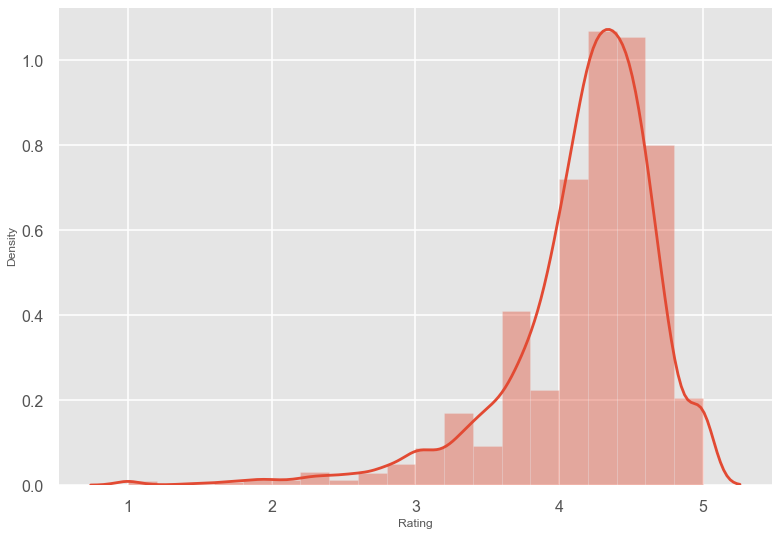

In [62]:
#Change the number of bins to 20
sns.distplot(ps_data1.Rating,bins=20)
plt.show()

In [63]:
ps_data1['Content Rating'].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Droping data of Adults only 18+ and Unrated       

In [64]:
ps_data1=ps_data1[~ps_data1['Content Rating'].isin(['Adults only 18+','Unrated'])]

In [65]:
ps_data1.shape

(8630, 13)

In [66]:
ps_data1.reset_index(inplace=True,drop=True)

In [67]:
ps_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   int64  
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 842.9+ KB


__Pie-Chart and Bar Chart__

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

PieChart

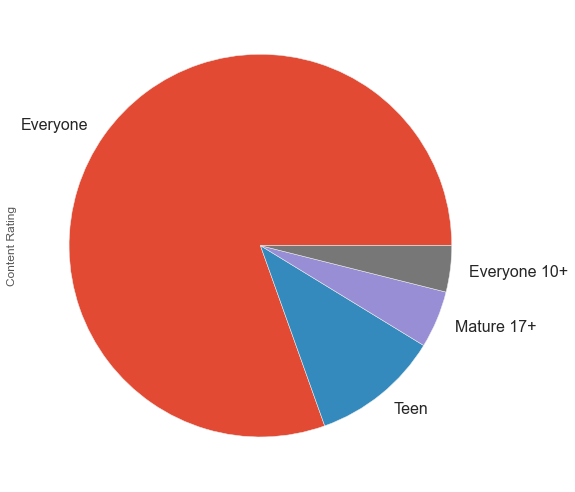

In [68]:
ps_data1['Content Rating'].value_counts().plot.pie()
plt.show()

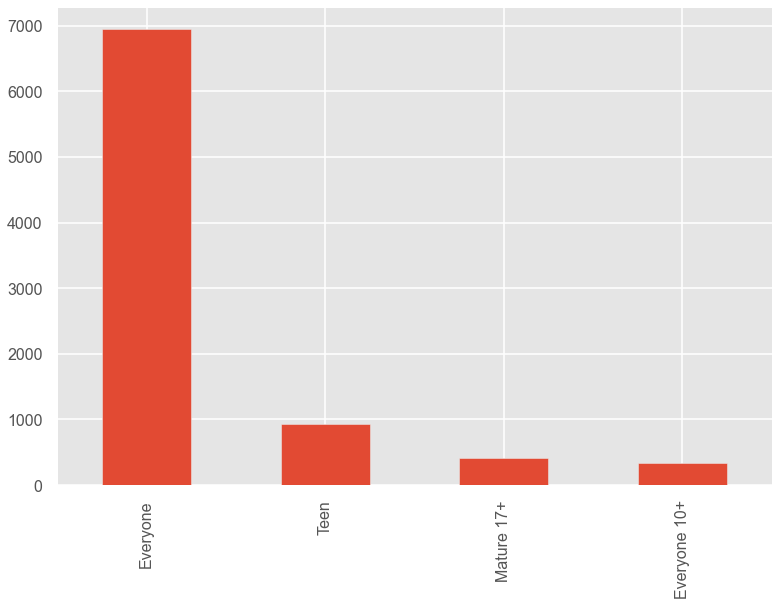

In [69]:
#Analyse the Content Rating column
ps_data1['Content Rating'].value_counts().plot.bar()
plt.show()

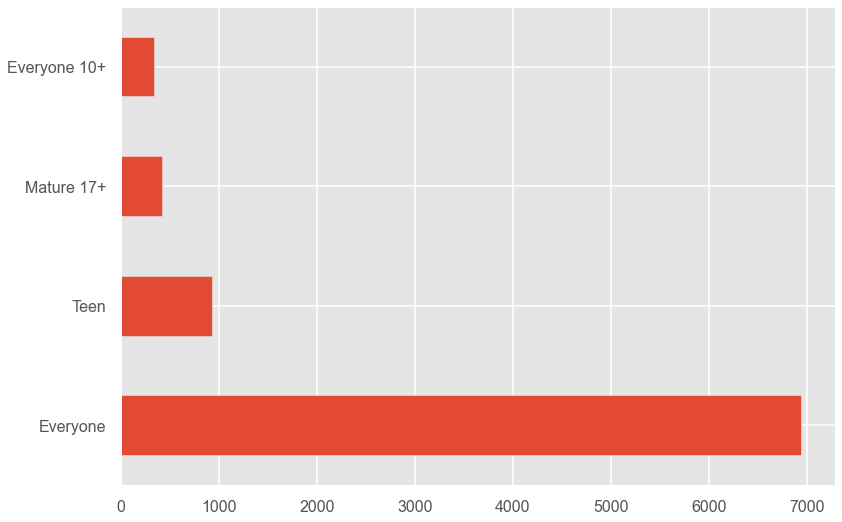

In [70]:
#Plot a bar chart(horizontal)
ps_data1["Content Rating"].value_counts().plot.barh()
plt.show()

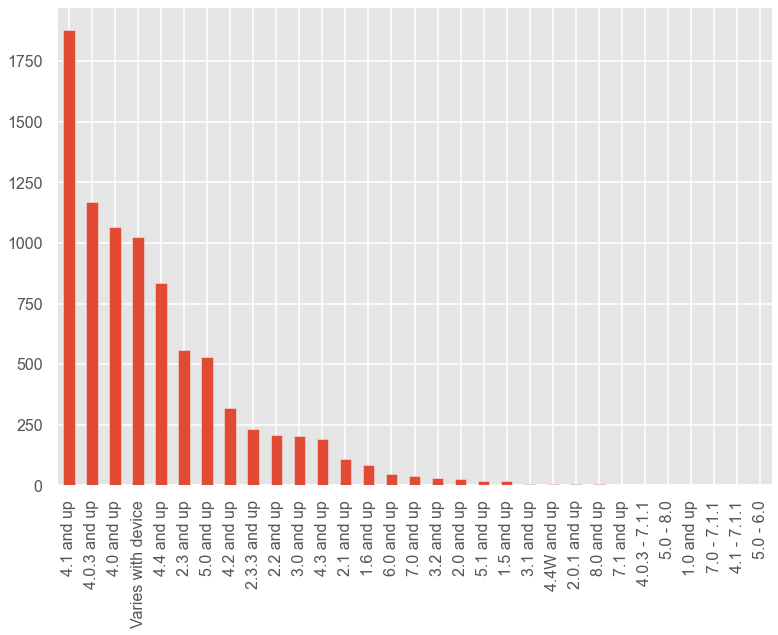

In [71]:
#Plot a bar plot for checking the 4th highest Android version type
ps_data1['Android Ver'].value_counts().plot.bar()
plt.show()

__Scatter plot- Size vs Rating__

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

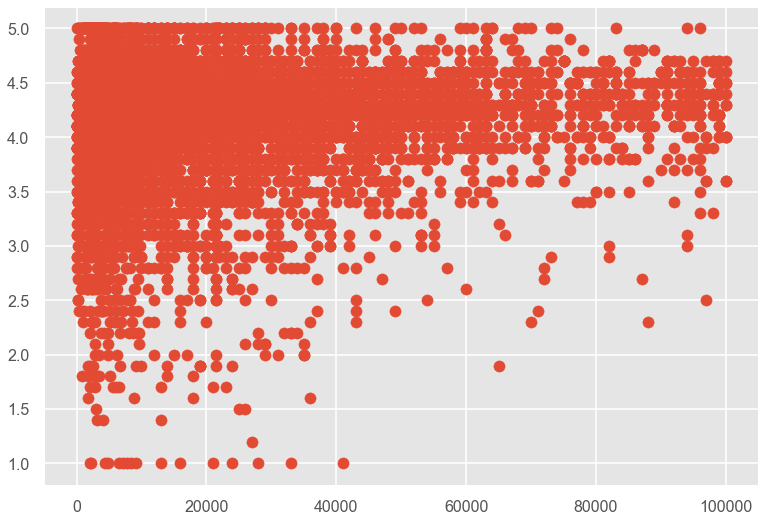

In [72]:
#Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(ps_data1.Size, ps_data1.Rating)
plt.show()

In [73]:
sns.set_style('white')

In [74]:
?sns.jointplot

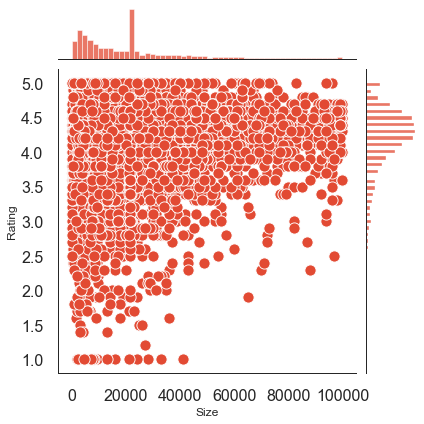

In [75]:
# Plot the same thing now using a jointplot
sns.jointplot(ps_data1.Size, ps_data1.Rating)
plt.show()

Rating vs Price

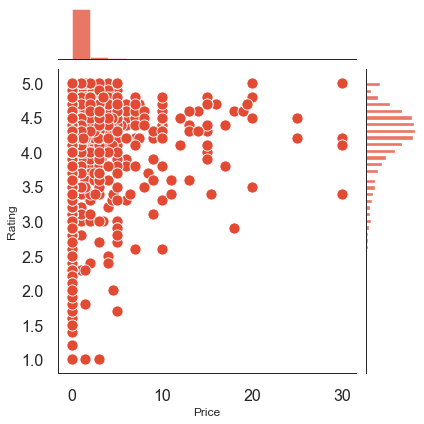

In [76]:
## Plot a jointplot for Price and Rating
sns.jointplot(ps_data1.Price,ps_data1.Rating)
plt.show()

__Reg Plots__

These are an extension to the jointplots, where a regression line is added to the view

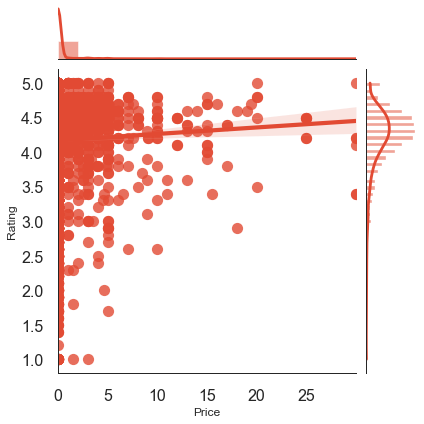

In [77]:
#Plot a reg plot for Price and Rating and observe the trendb
sns.jointplot(ps_data1.Price, ps_data1.Rating, kind='reg' )
plt.show()

## Pair Plots

1. When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix

2. For the non-diagonal views, it plots a scatter plot between 2 numeric variables

3. For the diagonal views, it plots a histogram

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

Looking at all numeric columns together-pair plot

In [78]:
?sns.pairplot

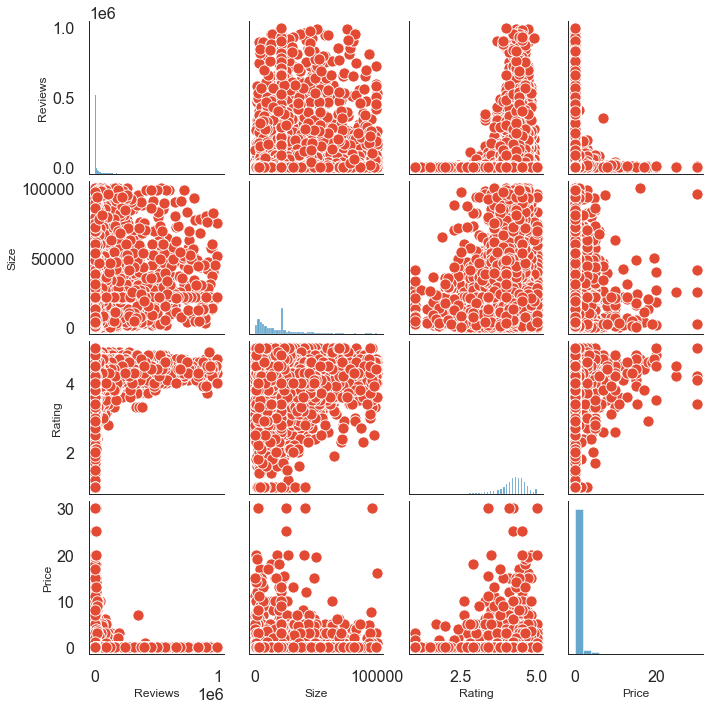

In [79]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(ps_data1[["Reviews",'Size','Rating','Price']])
plt.show()

__Content rating vs Rating__

<AxesSubplot:xlabel='Content Rating'>

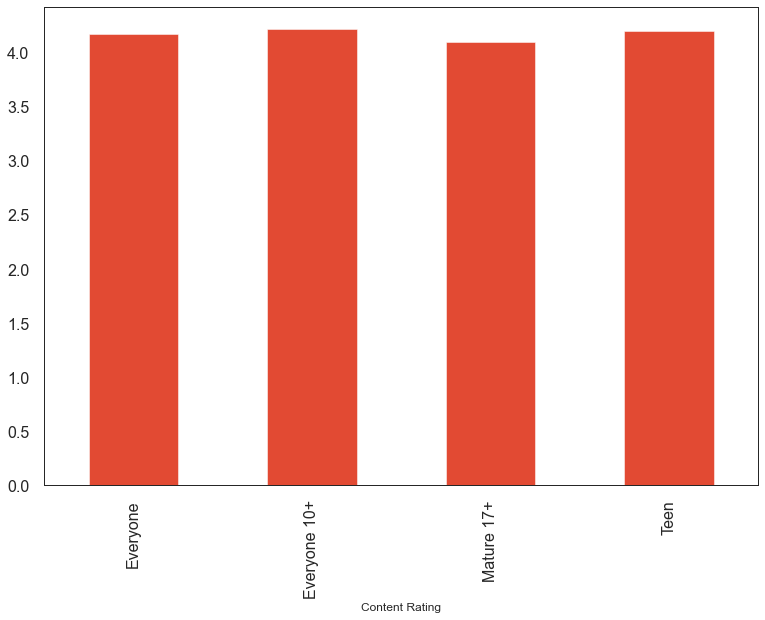

In [80]:
##Plot a bar plot of Content Rating vs Average Rating 
ps_data1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

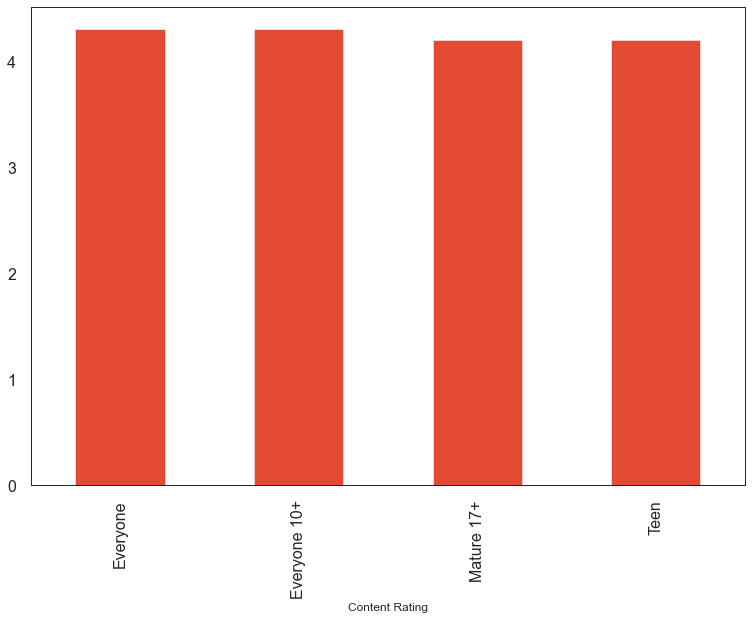

In [81]:
##Plot the bar plot again with Median Rating
ps_data1.groupby(['Content Rating'])['Rating'].median().plot.bar()

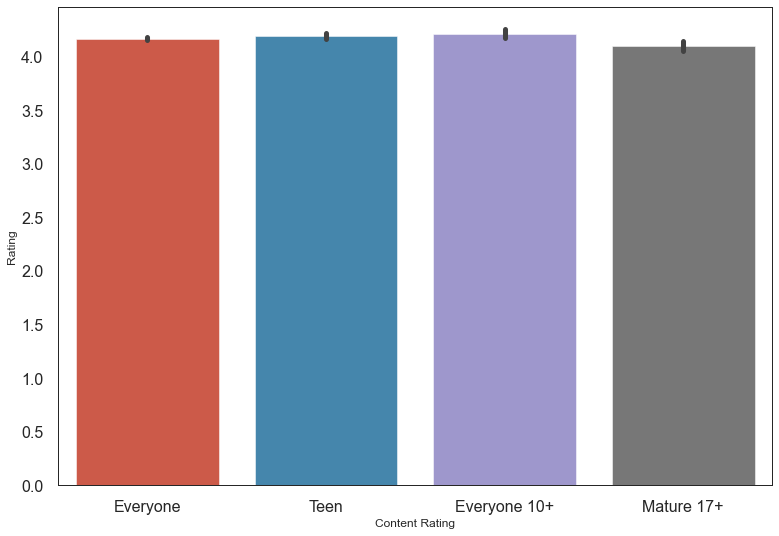

In [82]:
sns.barplot(data=ps_data1,x='Content Rating',y='Rating')
plt.show()

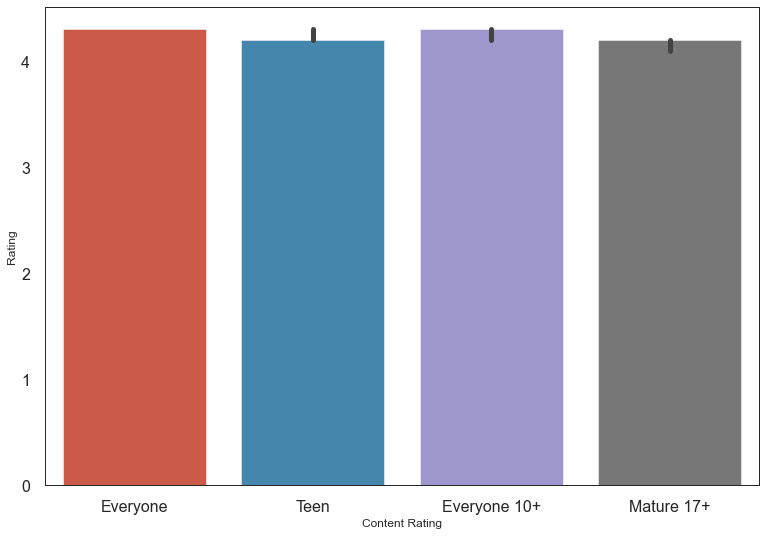

In [83]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=ps_data1,x='Content Rating',y='Rating', estimator=np.median)
plt.show()

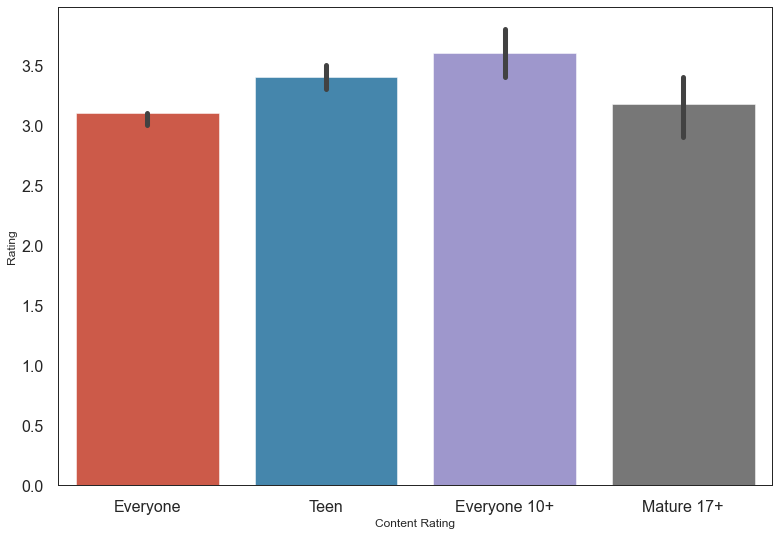

In [84]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=ps_data1,x='Content Rating',y='Rating', estimator=lambda x:np.quantile(x,0.05))
plt.show()

__Boxplot of rating for see  each Content Rating__

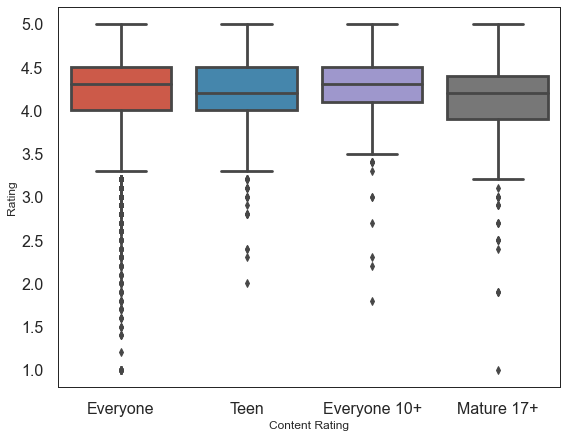

In [85]:
plt.figure(figsize=[9,7])
sns.boxplot(ps_data1['Content Rating'],ps_data1.Rating)
plt.show()

__Heatmap__

__Rating vs Size vs Content Rating__

In [86]:
?pd.qcut

In [87]:
##Prepare buckets for the Size column using pd.qcut
ps_data1['Size_Bucket']=pd.qcut(ps_data1.Size, [0, 0.2, 0.4 ,0.6 ,0.8 , 1],['VL','L','M','H','VH'])

In [88]:
ps_data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [89]:
?pd.pivot_table

In [90]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=ps_data1, index='Content Rating', columns='Size_Bucket', values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215699,4.170799,4.187396
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.138408,4.198131,4.246154


In [91]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=ps_data1, index='Content Rating', columns='Size_Bucket', values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [92]:
#Change the aggregation to 20th percentile
result=pd.pivot_table(data=ps_data1, index='Content Rating', columns='Size_Bucket', values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

In [93]:
?sns.heatmap

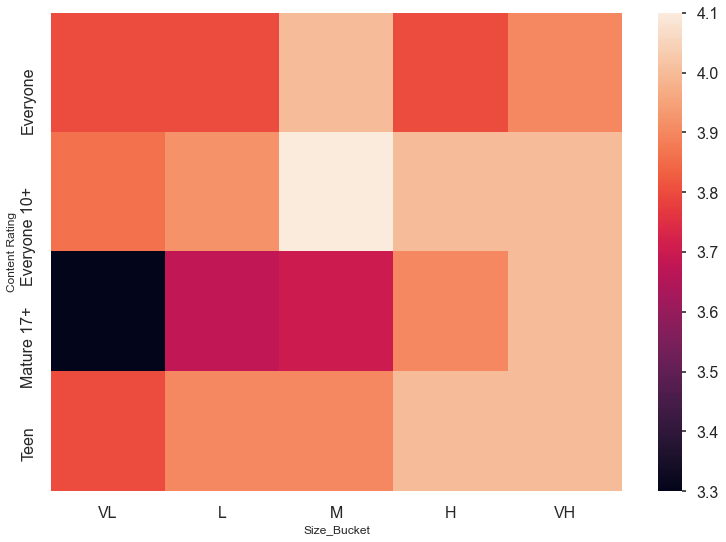

In [94]:
##Plot a heat map
sns.heatmap(result)
plt.show()

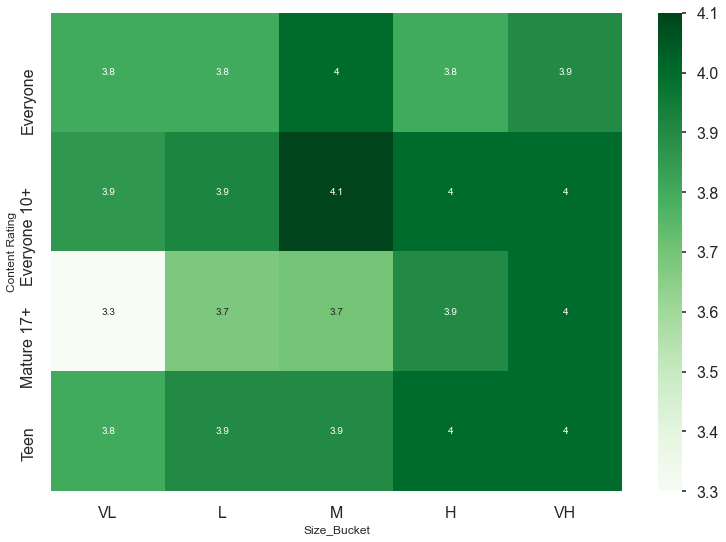

In [95]:
##Apply customisations
sns.heatmap(result, cmap="Greens", annot=True)
plt.show()

In [96]:
#checking data type 
ps_data1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [97]:
ps_data1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [98]:
# Extract the month from the Last Updated Date
ps_data1['updated_month']=pd.to_datetime(ps_data1['Last Updated']).dt.month

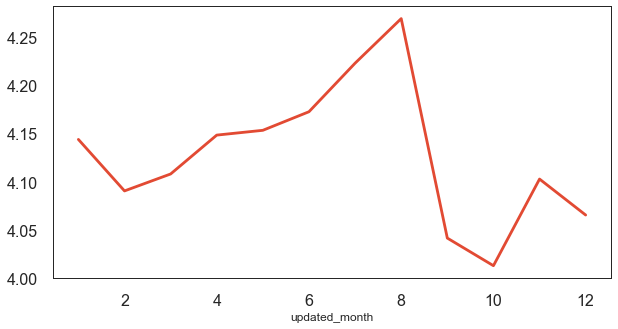

In [99]:
#Plot a line graph
plt.figure(figsize=[10,5])
ps_data1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

In [100]:
pd.pivot_table(data=ps_data1, values='Installs',index='updated_month',columns='Content Rating',aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,2361067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,8271109680,456556000,419491910,1943556800
8,7430943320,215821000,312981700,6257855650
9,260340410,24931100,2201010,22483100


In [101]:
monthly=pd.pivot_table(data=ps_data1, values='Installs',index='updated_month',columns='Content Rating',aggfunc=sum)

__Stacked Bar Charts__

A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well


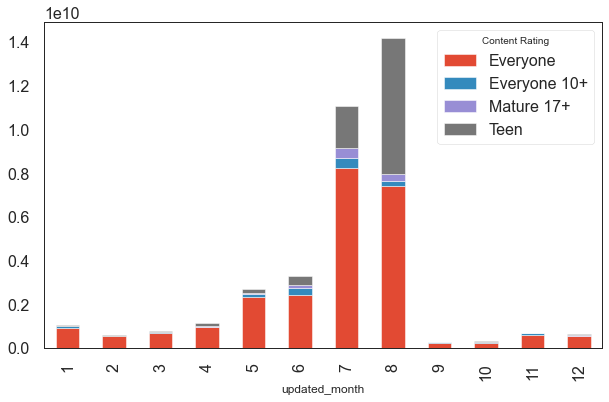

In [102]:
##Plot the stacked bar chart
umonthly.plot(kind='bar',stacked='True',figsize=[10,6])
plt.show()

Get proportion / percentage instead of absolut values

In [103]:
monthly_perc=monthly[['Everyone','Everyone 10+',"Mature 17+",'Teen']].apply(lambda x:x/x.sum(),axis=1)

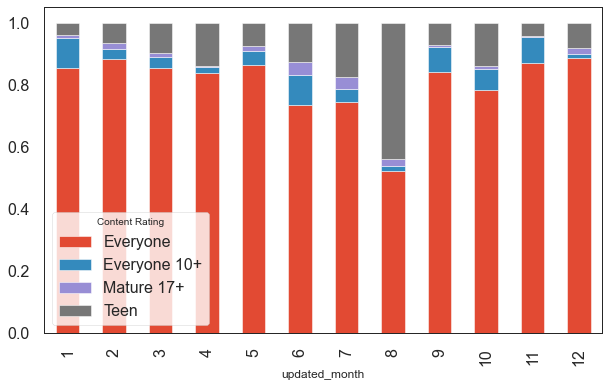

In [104]:
monthly_perc.plot(kind='bar', stacked='True', figsize=(10,6))
plt.show()